## 1) Feature Selection- Dropping constant features
In this step we will be removing the features which have constant features which are actually not important for solving the problem statement

In [1]:
import pandas as pd

In [2]:
data=pd.DataFrame({"A":[1,2,4,1,3,5],"B":[4,5,6,7,8,9],"C":[0,0,0,0,0,0],"D":[1,1,1,1,1,1]})

In [3]:
data.head()

,A,B,C,D
0,1,4,0,1
1,2,5,0,1
2,4,6,0,1
3,1,7,0,1
4,3,8,0,1


### Variance Threshold
Feature selector that removes all low-variance features.

This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

In [4]:
## It will remove zero variance features

from sklearn.feature_selection import VarianceThreshold  ## It just gives the index and not directly drops the feature

In [6]:
thres= VarianceThreshold(threshold=0)

In [7]:
thres.fit(data)

VarianceThreshold(threshold=0)

In [8]:
thres.get_support()

array([ True,  True, False, False])

In [10]:
data[thres.get_support()]

ValueError: Item wrong length 4 instead of 6.

In [11]:
data.columns[thres.get_support()]

Index(['A', 'B'], dtype='object')

In [18]:
type(data.columns[thres.get_support()])

pandas.core.indexes.base.Index

In [13]:
constant_columns = [ c for c in data.columns if c not in data.columns[thres.get_support()]]

In [14]:
constant_columns


['C', 'D']

In [16]:
for features in constant_columns:
    print(features)

C
D


In [17]:
data.drop(constant_columns,axis=1)

,A,B
0,1,4
1,2,5
2,4,6
3,1,7
4,3,8
5,5,9


In [1]:
## Lets practise on bigger dataset

In [2]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

In [3]:
df=pd.read_csv("santander.csv")

In [4]:
df.shape

(76020, 371)

In [5]:
df=pd.read_csv("santander.csv",nrows=10000)

In [6]:
df.shape


(10000, 371)

In [7]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [8]:
X=df.drop(labels=['TARGET'], axis=1)
Y=df['TARGET']

In [9]:
from sklearn.model_selection import train_test_split
## Seperate dataset into train and test

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3,random_state=0)

In [11]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((7000, 370), (3000, 370), (7000,), (3000,))

#### Lets apply the variance threshold

In [12]:
thres = VarianceThreshold(threshold=0)
thres.fit(X_train)

VarianceThreshold(threshold=0)

In [13]:
thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [14]:
sum(thres.get_support())

284

In [15]:
constant_columns = [c for c in X_train.columns if c not in X_train[thres.get_support()]]

ValueError: Item wrong length 370 instead of 7000.

In [16]:
constant_columns = [c for c in X_train.columns if c not in X_train.columns[thres.get_support()]]

In [17]:
constant_columns.shape

AttributeError: 'list' object has no attribute 'shape'

In [18]:
len(constant_columns)    ## 370-284 = 86

86

In [19]:

for column in constant_columns:
    print(column)

ind_var2_0
ind_var2
ind_var13_medio_0
ind_var13_medio
ind_var18_0
ind_var18
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var34_0
ind_var34
ind_var41
ind_var46_0
ind_var46
num_var13_medio_0
num_var13_medio
num_var18_0
num_var18
num_var27_0
num_var28_0
num_var28
num_var27
num_var34_0
num_var34
num_var41
num_var46_0
num_var46
saldo_var13_medio
saldo_var18
saldo_var28
saldo_var27
saldo_var34
saldo_var41
saldo_var46
delta_imp_amort_var18_1y3
delta_imp_amort_var34_1y3
delta_imp_reemb_var17_1y3
delta_imp_reemb_var33_1y3
delta_imp_trasp_var17_out_1y3
delta_imp_trasp_var33_out_1y3
delta_num_reemb_var17_1y3
delta_num_reemb_var33_1y3
delta_num_trasp_var17_out_1y3
delta_num_trasp_var33_out_1y3
imp_amort_var18_hace3
imp_amort_var18_ult1
imp_amort_var34_hace3
imp_amort_var34_ult1
imp_var7_emit_ult1
imp_reemb_var13_hace3
imp_reemb_var17_hace3
imp_reemb_var17_ult1
imp_reemb_var33_hace3
imp_reemb_var33_ult1
imp_trasp_var17_in_hace3
imp_trasp_var17_out_hace3
imp_trasp_var17_out_ult1
imp_trasp_var33_i

In [ ]:
## We need to drop all these 86 columns

In [20]:
X_train.drop(constant_columns, axis = 1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
7681,15431,2,42,840.0,4477.02,4989.54,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37491.21
9031,18181,2,31,0.0,52.32,52.32,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106685.94
3691,7411,2,51,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66144.66
202,407,2,36,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92121.36
5625,11280,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74650.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,18564,2,33,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117547.89
4859,9723,2,24,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71050.83
3264,6557,2,24,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,141069.33
9845,19796,2,38,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86412.15


In [21]:
## This is the dataset after removing the useless constant features( with threshold = 0 but if we want threshold as 10% we need to set it's value as 0.1)

## 2. Feature Selection- With Correlation

#### In this step we will be removing the features which are highly correlated

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
from sklearn.datasets import load_boston

In [24]:
load_boston

<function sklearn.datasets._base.load_boston(*, return_X_y=False)>

In [25]:
load_boston.head()

AttributeError: 'function' object has no attribute 'head'

In [26]:
## We need to load dataset

data = load_boston()

In [38]:
type(data)

sklearn.utils.Bunch

In [27]:
data  ## Data is in bunch, we need to convert it into dataframe

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [29]:
df = pd.DataFrame(data=data, columns=data.feature_names)

In [30]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT


In [31]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [32]:
df["MEDV"]=data.target

In [33]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [37]:
dir(data)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [39]:
data.data  ## This is data in aray format which we converted into dataframe

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [40]:
data.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [41]:
##-----------------

In [42]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [46]:
X = df.drop("MEDV",axis = 1)    ## Feature Selection
Y = df["MEDV"]                               

In [47]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [48]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [50]:
X_train.shape, X_test.shape

((354, 13), (152, 13))

##### Any feature selection operation we perform will be on X_train and not on X_test in order to avoid overfitting.
##### Once we are done with feature selection operations on X_train , we will perform same operations on X_test.

In [51]:
X_train.corr()           ## It uses pearsons co-relation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.196172,0.382073,-0.049364,0.416560,-0.188280,0.329927,-0.355840,0.603880,0.560570,0.264780,-0.299525,0.439369
ZN,-0.196172,1.000000,-0.529392,-0.063863,-0.523572,0.319260,-0.583885,0.658331,-0.314833,-0.327834,-0.392838,0.164641,-0.429178
INDUS,0.382073,-0.529392,1.000000,0.044224,0.750218,-0.392969,0.629257,-0.686848,0.578459,0.719038,0.388353,-0.331638,0.603374
CHAS,-0.049364,-0.063863,0.044224,1.000000,0.043748,0.088125,0.067269,-0.085492,0.022338,-0.017156,-0.072683,0.069682,-0.059060
NOX,0.416560,-0.523572,0.750218,0.043748,1.000000,-0.279202,0.740052,-0.765753,0.627188,0.683445,0.179046,-0.369445,0.577154
RM,-0.188280,0.319260,-0.392969,0.088125,-0.279202,1.000000,-0.235839,0.183857,-0.179242,-0.275242,-0.385526,0.157459,-0.623920
AGE,0.329927,-0.583885,0.629257,0.067269,0.740052,-0.235839,1.000000,-0.761543,0.440578,0.502429,0.239729,-0.250416,0.606530
DIS,-0.355840,0.658331,-0.686848,-0.085492,-0.765753,0.183857,-0.761543,1.000000,-0.467653,-0.519643,-0.176620,0.248376,-0.501780
RAD,0.603880,-0.314833,0.578459,0.022338,0.627188,-0.179242,0.440578,-0.467653,1.000000,0.907455,0.437687,-0.415325,0.442783
TAX,0.560570,-0.327834,0.719038,-0.017156,0.683445,-0.275242,0.502429,-0.519643,0.907455,1.000000,0.447518,-0.412145,0.515905


In [55]:
len(X_train.corr())

13

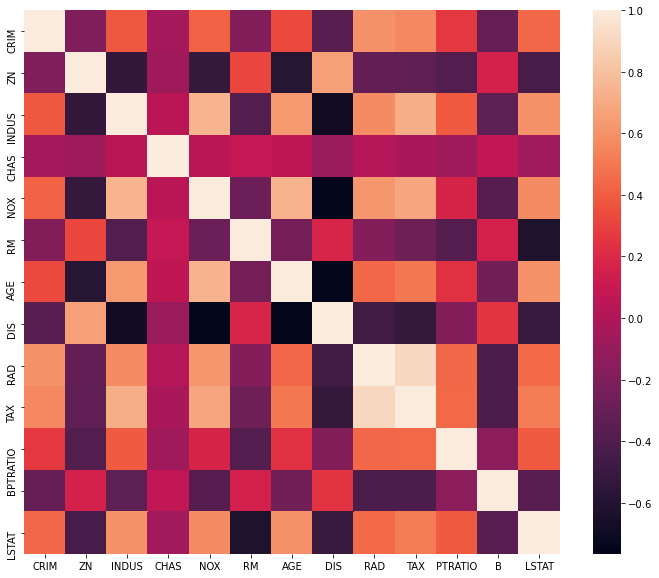

In [53]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor=X_train.corr()
sns.heatmap(cor)


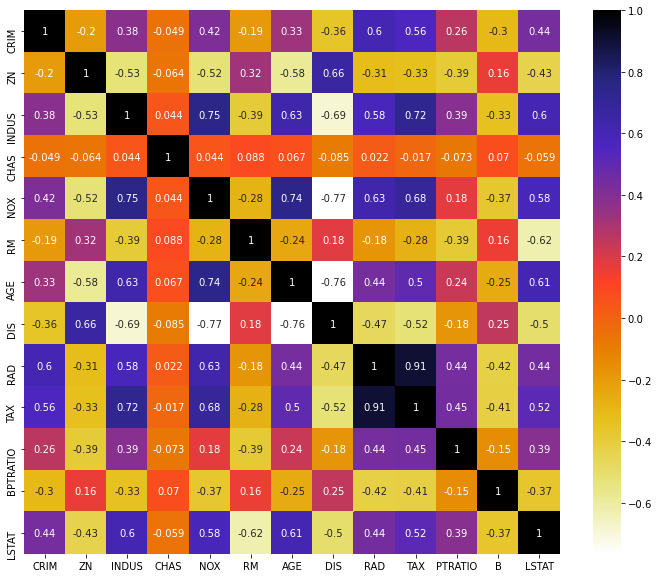

In [54]:
plt.figure(figsize=(12,10))
cor=X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)     ## Press tab after "cm." to see all the options

In [ ]:
## Now we can see, TAX is highly + correlated with RAD , therefore, we can drop any of the feature as it won't affect our data 

In [ ]:
## Even Age is highly -ve correlated with DIS, but we can't drop any of them as they are negatively correlated and this information is useful for our machine learning model

In [56]:
type(cor)

pandas.core.frame.DataFrame

In [57]:
cor[1,1]

KeyError: (1, 1)

In [60]:
cor.iloc[0,0]

1.0

In [61]:
cor.iloc[0:2,0:2]

,CRIM,ZN
CRIM,1.000000,-0.196172
ZN,-0.196172,1.000000


In [62]:
cor.iloc[4:6,4:6]

,NOX,RM
NOX,1.000000,-0.279202
RM,-0.279202,1.000000


In [63]:
cor.iloc[1,9]

-0.3278340058498598

In [67]:

# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    cor=dataset.corr()
    correlated=set()
    for i in range(len(cor)):
        for j in range(i):
            if (cor.iloc[i,j]>threshold):
                correlated.add(i)
                
    print(correlated)

In [68]:
correlation(X_train,0.8)

{9}


In [69]:

# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    cor=dataset.corr()
    correlated=set()
    for i in range(len(cor)):
        for j in range(i):
            if (cor.iloc[i,j]>threshold):
                col_name=cor.columns[i]
                correlated.add(col_name)
                
    print(correlated)

In [74]:
correlation(X_train,0.8)

{'TAX'}


In [75]:
correlated

NameError: name 'correlated' is not defined

In [82]:

# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    cor=dataset.corr()
    correlated=set()
    for i in range(len(cor)):
        for j in range(i):
            if (cor.iloc[i,j]>threshold):
                col_name=cor.columns[i]
                correlated.add(col_name)
                
    
    return correlated

In [83]:
correlation(X_train,0.8)

{'TAX'}

In [84]:
correlated

NameError: name 'correlated' is not defined

In [85]:
c=correlation(X_train,0.8)

In [86]:
type(c)

set

In [87]:
c

{'TAX'}

In [88]:
len(c)

1

In [89]:
c=correlation(X_train,0.7)

In [90]:
c

{'AGE', 'NOX', 'TAX'}

In [91]:
len(c)

3

In [92]:
##{'AGE', 'NOX', 'TAX'} these are the features that we can drop as they have positive correaltion with other features(which means that their behaviour is similar to some other features and won't make any difference to the ml model if we dropped them)

In [ ]:
## If we even want to consider -ve correlation(which is not a good practice though) we can use this function:

In [93]:

def correlation(dataset, threshold):
    cor=dataset.corr()
    correlated=set()
    for i in range(len(cor)):
        for j in range(i):
            if abs(cor.iloc[i,j])>threshold:
                col_name=cor.columns[i]
                correlated.add(col_name)
                
    
    return correlated

In [95]:
correlation(X_train,0.7)

{'AGE', 'DIS', 'NOX', 'TAX'}

In [ ]:
## {'AGE', 'DIS', 'NOX', 'TAX'}. Now we have this 4 features which are highly correalted with others and we can drop them

In [96]:
c ## Only +vely correlated

{'AGE', 'NOX', 'TAX'}

In [98]:
X_train.drop(c,axis=1)  ## As said before, we will perform all operations on Train and then just do the same on Test at last 
X_test.drop(c,axis=1)

,CRIM,ZN,INDUS,CHAS,RM,DIS,RAD,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,6.333,5.2146,4.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,6.216,1.1691,24.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,6.373,3.3633,5.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,5.349,1.7028,24.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,6.232,5.0141,5.0,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0.0,7.147,6.0622,3.0,18.7,396.90,5.33
428,7.36711,0.0,18.10,0.0,6.193,1.9356,24.0,20.2,96.73,21.52
385,16.81180,0.0,18.10,0.0,5.277,1.4261,24.0,20.2,396.90,30.81
308,0.49298,0.0,9.90,0.0,6.635,3.3175,4.0,18.4,396.90,4.54


## Let try with Big Dataset

In [112]:
df= pd.read_csv("santander.csv",nrows=10000)

In [113]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [114]:
df.corr()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,1.000000,-0.002846,-0.002679,0.025045,0.007413,0.003251,0.002660,-0.005608,0.009758,0.010021,...,-0.013220,-0.008712,-0.011174,-0.010427,-0.010669,-0.007283,-0.008595,-0.008657,-0.007914,-0.013538
var3,-0.002846,1.000000,-0.007258,0.001157,0.005783,0.005883,0.001211,0.001369,0.000563,0.000586,...,0.000434,0.000442,0.000464,0.000485,0.000709,0.000411,0.000849,0.000841,-0.000066,0.005312
var15,-0.002679,-0.007258,1.000000,0.033298,0.112041,0.117091,0.060546,0.071889,0.015706,0.013459,...,0.022834,0.021089,0.023337,0.023729,0.026193,0.018280,0.030226,0.029057,0.002010,0.110678
imp_ent_var16_ult1,0.025045,0.001157,0.033298,1.000000,0.022729,0.019085,0.011131,0.008149,0.003582,0.008125,...,-0.000699,-0.000690,-0.000645,-0.000643,-0.001113,-0.000604,-0.001359,-0.001344,0.000796,0.000212
imp_op_var39_comer_ult1,0.007413,0.005783,0.112041,0.022729,1.000000,0.877528,0.475310,0.421565,0.074839,0.100495,...,0.015432,0.039172,0.022054,0.029143,0.006858,0.000325,0.004799,0.003938,0.002213,0.026247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace3,-0.007283,0.000411,0.018280,-0.000604,0.000325,0.000958,-0.000621,-0.000683,-0.000295,-0.000306,...,-0.000221,-0.000219,-0.000237,-0.000247,0.810665,1.000000,0.595163,0.617328,0.015887,-0.002779
saldo_medio_var44_ult1,-0.008595,0.000849,0.030226,-0.001359,0.004799,0.005448,-0.001398,-0.001539,-0.000664,-0.000690,...,-0.000499,-0.000492,-0.000534,-0.000556,0.902203,0.595163,1.000000,0.991274,0.006543,-0.006258
saldo_medio_var44_ult3,-0.008657,0.000841,0.029057,-0.001344,0.003938,0.004291,-0.001382,-0.001521,-0.000656,-0.000682,...,-0.000493,-0.000487,-0.000528,-0.000549,0.919532,0.617328,0.991274,1.000000,0.007447,-0.006186
var38,-0.007914,-0.000066,0.002010,0.000796,0.002213,-0.000029,0.005327,0.002510,-0.002082,-0.002140,...,0.005719,0.001661,0.005284,0.004938,0.011091,0.015887,0.006543,0.007447,1.000000,-0.027689


In [115]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor=df.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)   ## It's taking huge amount of time to load the graph as the input size is huge.
## But! we still can't observe the insights from the graph even if it's loaded as the graph is very detailed. So we will just use a function and drop the correlated columns 

Error in callback <function flush_figures at 0x0000021EEDDDF940> (for post_execute):


KeyboardInterrupt: 

In [116]:
## But first we need to perform train test split before anything else

In [117]:
X= df.drop("TARGET",axis=1)
Y= df["TARGET"]

In [118]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split( X ,Y ,test_size =0.3, random_state=0 )


In [120]:
X_train.shape , x_test.shape

((7000, 370), (3000, 370))

In [121]:
## Once we are done with train test splitting , we should start performing feature selection and not before that 

In [122]:
def correlation(dataset, threshold):
    cor=dataset.corr()
    correlated=set()
    for i in range(len(cor)):
        for j in range(i):
            if (cor.iloc[i,j]>threshold):
                col_name=cor.columns[i]
                correlated.add(col_name)
                
    
    return correlated

In [124]:
c=correlation(X_train,0.9)

In [125]:
c

{'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_venta_var44_1y3',
 'imp_aport_var17_ult1',
 'imp_aport_var33_hace3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_reemb_var13_ult1',
 'imp_trasp_var17_in_ult1',
 'imp_trasp_var33_in_ult1',
 'imp_venta_var44_ult1',
 'ind_var10cte_ult1',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_largo',
 'ind_var20',
 'ind_var24',
 'ind_var25',
 'ind_var25_0',
 'ind_var26',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var29',
 'ind_var29_0',
 'ind_var31',
 'ind_var32',
 'ind_var32_0',
 'ind_var37',
 'ind_var37_0',
 'ind_var39',
 'ind_var40',
 'ind_var40_0',
 'ind_var41_0',
 'ind_var44',
 'ind_var6',
 'ind_var8',
 'ind_var9_cte_ult1',
 'ind_var9_ult1',
 'num_aport_var13_ult1',
 'num_aport_var17

In [126]:
len(c)

155

In [ ]:
## Here , there are 155 features which are highly +vely correlated with some other features. Therefore, we can drop them

In [127]:
X_train.drop(c,axis=1)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var41_comer_ult1,...,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var44_hace2,var38
7681,15431,2,42,840.0,4477.02,4989.54,0.0,0.0,0,4477.02,...,0,0,0,0,0.0,0.0,0.0,0,0.0,37491.21
9031,18181,2,31,0.0,52.32,52.32,0.0,0.0,0,52.32,...,0,0,0,0,0.0,0.0,0.0,0,0.0,106685.94
3691,7411,2,51,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,66144.66
202,407,2,36,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,92121.36
5625,11280,2,23,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,74650.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,18564,2,33,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,117547.89
4859,9723,2,24,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,71050.83
3264,6557,2,24,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,141069.33
9845,19796,2,38,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,86412.15


In [128]:
x_test.drop(c,axis=1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var41_comer_ult1,...,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var44_hace2,var38
9394,18882,2,23,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,75170.310000
898,1778,2,79,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,57855.510000
2398,4806,2,38,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,117310.979016
5906,11854,2,48,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,50659.230000
2343,4697,2,23,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,43843.320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,8026,2,28,0.0,237.45,237.45,0.0,0.0,0,237.45,...,0,0,0,0,0.0,0.0,0.0,0,0.0,103622.310000
7375,14795,2,23,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,51898.800000
9307,18726,2,25,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,99251.790000
8394,16923,2,50,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,117310.979016


####  Now, as we can see there are only 215 columns out of 371 as 155 columns are dropped as they are highly correlated

In [ ]:
## This is how we perform feature selection